Policy iteration

In [20]:
import numpy as np
import random


# Define a upgradeable policy
class Policy:
    def __init__(self, grid_size):
        # 0 ↑       1 →         2 ↓         3 ←         4: stop
        self.policy = {}
        for i in range(grid_size): # policy iteration 需要初始化策略
            for j in range(grid_size):
                self.policy.update({(i, j): random.randint(0, 4)})
    
    def upgrade(self, x, y, action):
        self.policy[x, y] = action

class Reward:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.R = np.zeros((grid_size, grid_size))
        # Terminal states
        self.R[3, 2] = 1
        # Forbidden states
        self.R[1, 1] = self.R[1, 2] = self.R[2, 2] = self.R[3, 1] = self.R[3, 3] = self.R[4, 1] = -10
        # Boundary action
    def __call__(self, state, action, next_state):
        x, y = state
        x_n, y_n = next_state
        if x == 0 and action == 0:
            return -1 # 最上面往上走
        elif x == self.grid_size-1 and action == 2:
            return -1 # 最下面往下走
        elif y == 0 and action == 3:
            return  -1 # 最左边往左走
        elif y == self.grid_size-1 and action == 1:
            return  -1 # 最右边往右走
        elif (x == 0 and y == 0 and action == 3) \
                or (x == 0 and y == self.grid_size-1 and action == 1) \
                or (x == self.grid_size-1 and y == 0 and action == 3) \
                or (x == self.grid_size-1 and y == self.grid_size-1 and action == 1):
            return -1
        else:
            return self.R[x_n, y_n]

def get_next_state(state, action, grid_size):
    x, y = state
    if action == 0:
        return (max(x-1, 0), y)
    elif action == 1:
        return (x, min(y+1, grid_size-1))
    elif action == 2:
        return (min(x+1, grid_size-1), y)
    elif action == 3:
        return (x, max(y-1, 0))
    elif action == 4:
        return (x, y)

# Grid world size
grid_size = 5
# Initialize value function
V = np.zeros((grid_size, grid_size)) #顺便初始化了
# Discount factor
gamma = 0.9
# Policy evaluation using value iteration
theta = 1e-9
policy = Policy(grid_size)
R = Reward(grid_size)
k = 0
while k < 10:
    delta = 1 # 这里移下来 以确保下次不会跳过pe阶段
    k+=1
    V_new = np.zeros_like(V)  # 放这里初始化 需要用到copy 否则会同步更新 导致只能更新两次
    # policy evaluation：求state value
    while delta > theta:
        # V_new = np.zeros_like(V)  # 放这里初始化 没问题
        delta = 0
        for x in range(grid_size):
            for y in range(grid_size):
                next_state = get_next_state((x, y), action=policy.policy[x,y], grid_size=grid_size)# 每步固定
                V_new[x, y] = R((x, y), policy.policy[x,y], next_state) + gamma * V[next_state] # 确定性的策略 确定性的奖励
                delta = max(delta, abs(V[x, y] - V_new[x, y])) 
        V = V_new.copy()
        
        
    # policy improvement：更新策略
    for x in range(grid_size):
        for y in range(grid_size):
            max_q = float('-inf') # 这个有负数 所以不能是0 
            for action in range(0,5):
                next_state = get_next_state((x, y), action, grid_size)
                q_pi = R((x, y), action, next_state) + gamma * V[next_state]
                if q_pi > max_q: 
                    policy.upgrade(x, y, action)
                    max_q = q_pi
print("Value function:")
print(np.round(V, decimals=1))

Value function:
[[ 3.5  3.9  4.3  4.8  5.3]
 [ 3.1  3.5  4.8  5.3  5.9]
 [ 2.8  2.5 10.   5.9  6.6]
 [ 2.5 10.  10.  10.   7.3]
 [ 2.3  9.  10.   9.   8.1]]


Optimal value function:
[[ 3.5  3.9  4.3  4.8  5.3]
 [ 3.1  3.5  4.8  5.3  5.9]
 [ 2.8  2.5 10.   5.9  6.6]
 [ 2.5 10.  10.  10.   7.3]
 [ 2.3  9.  10.   9.   8.1]]
Optimal policy:


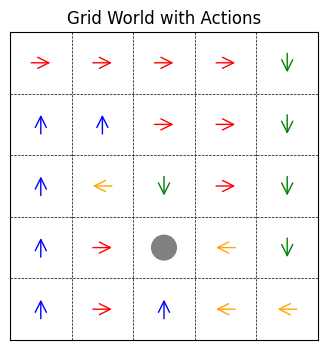

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Policy:
    """
    Policy class defines an upgradeable policy for a grid world.
    """
    def __init__(self, grid_size):
        # Actions: 0 ↑, 1 →, 2 ↓, 3 ←, 4 stop
        self.policy = {(i, j): random.randint(0, 4) for i in range(grid_size) for j in range(grid_size)}

    def upgrade(self, x, y, action):
        self.policy[x, y] = action


class Reward:
    """
    Reward class defines the reward structure for a grid world.
    """
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.R = np.zeros((grid_size, grid_size))
        # Terminal states
        self.R[3, 2] = 1
        # Forbidden states
        self.R[1, 1] = self.R[1, 2] = self.R[2, 2] = self.R[3, 1] = self.R[3, 3] = self.R[4, 1] = -10

    def __call__(self, state, action, next_state):
        x, y = state
        x_n, y_n = next_state
        # Boundary conditions and forbidden states
        if x == 0 and action == 0:
            return -1 # 最上面往上走
        elif x == self.grid_size-1 and action == 2:
            return -1 # 最下面往下走
        elif y == 0 and action == 3:
            return  -1 # 最左边往左走
        elif y == self.grid_size-1 and action == 1:
            return  -1 # 最右边往右走
        elif (x == 0 and y == 0 and action == 3) \
                or (x == 0 and y == self.grid_size-1 and action == 1) \
                or (x == self.grid_size-1 and y == 0 and action == 3) \
                or (x == self.grid_size-1 and y == self.grid_size-1 and action == 1):
            return -1
        else:
            return self.R[x_n, y_n]    


def get_next_state(state, action, grid_size):
    """
    Calculate the next state given the current state and action.
    """
    x, y = state
    if action == 0:  # up
        return (max(x - 1, 0), y)
    elif action == 1:  # right
        return (x, min(y + 1, grid_size - 1))
    elif action == 2:  # down
        return (min(x + 1, grid_size - 1), y)
    elif action == 3:  # left
        return (x, max(y - 1, 0))
    elif action == 4:  # stop
        return (x, y)


def policy_iteration(grid_size, gamma, theta, max_iterations):
    """
    Perform policy iteration to find the optimal policy and value function.
    """
    V = np.zeros((grid_size, grid_size))
    policy = Policy(grid_size)
    R = Reward(grid_size)
    
    for iteration in range(max_iterations):
        delta = 1
        while delta > theta: # 这里改为求k步 就变成了 truncated policy iteration
            V_new = np.zeros_like(V)
            delta = 0
            for x in range(grid_size):
                for y in range(grid_size):
                    action = policy.policy[(x, y)]
                    next_state = get_next_state((x, y), action, grid_size)
                    new_v = R((x, y), action, next_state) + gamma * V[next_state]
                    V_new[x, y] = new_v
                    delta = max(delta, abs(V[x, y] - new_v))
            V = V_new.copy()

        # Policy improvement
        for x in range(grid_size):
            for y in range(grid_size):
                max_q = float('-inf')
                best_action = None
                for action in range(5):
                    next_state = get_next_state((x, y), action, grid_size)
                    q_pi = R((x, y), action, next_state) + gamma * V[next_state]
                    if q_pi > max_q:
                        best_action = action
                        max_q = q_pi
                policy.upgrade(x, y, best_action)

    return V, policy

def draw_grid(grid_size, policy):
    """
    绘制网格并根据动作绘制形状。
    
    :param grid_size: 网格的大小
    :param policy: 每个状态的动作策略
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    
    # 绘制网格
    for i in range(grid_size + 1):
        ax.axhline(i, color='k', linestyle='--', linewidth=0.5)
        ax.axvline(i, color='k', linestyle='--', linewidth=0.5)
    
    # 绘制每个网格单元中的动作
    for (x, y), action in policy.policy.items():
        center_x, center_y = y + 0.5, grid_size - x - 0.5  # y + 0.5, grid_size - x - 0.5 确保中心位置正确
        if action == 0:  # ↑
            ax.add_patch(patches.FancyArrowPatch((center_x, center_y - 0.2), (center_x, center_y + 0.2),
                                                 mutation_scale=20, color='blue', arrowstyle='->'))
        elif action == 1:  # →
            ax.add_patch(patches.FancyArrowPatch((center_x - 0.2, center_y), (center_x + 0.2, center_y),
                                                 mutation_scale=20, color='red', arrowstyle='->'))
        elif action == 2:  # ↓
            ax.add_patch(patches.FancyArrowPatch((center_x, center_y + 0.2), (center_x, center_y - 0.2),
                                                 mutation_scale=20, color='green', arrowstyle='->'))
        elif action == 3:  # ←
            ax.add_patch(patches.FancyArrowPatch((center_x + 0.2, center_y), (center_x - 0.2, center_y),
                                                 mutation_scale=20, color='orange', arrowstyle='->'))
        elif action == 4:  # stop
            ax.add_patch(patches.Circle((center_x, center_y), 0.2, color='gray'))

    # 设置轴的属性
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Grid World with Actions')
    
    plt.show()


def main():
    grid_size = 5
    gamma = 0.9
    theta = 1e-9
    max_iterations = 20

    V, policy = policy_iteration(grid_size, gamma, theta, max_iterations)
    print("Optimal value function:")
    print(np.round(V, decimals=1))
    print("Optimal policy:")
    draw_grid(grid_size, policy)


if __name__ == "__main__":
    main()